# Procedimiento para Catalogar Cáncer Luminal A y B

Este archivo contiene el proceso de limpieza, exploración y análisis de la base de datos del proyecto de de cáncer de mama en base a la información de los diagnosticos de diversos pacientes registrados por la Secretaria de Salud y la información de utilidad proporcionada por el Ingeniero Jesús Esteban Cienfuegos Zurita.

Utilizamos la metodología CRISSP para la comprensión del negocio, la comprensión de los datos reales, y la preparación de los datos. Esto nos permite comenzar a formar una estructuración de los datos y de lo que conocemos de ellos para observar a fondo que información nos pueden proporcionar; la información que buscamos nos permitirá desarrollar un modelo predictivo cómo parte de las siguientes fases del proyecto.



---

##### 1. Exploración y Limpieza de Datos

In [850]:
"""
Pandas es una biblioteca de Python especializada en la manipulación y análisis de datos.
Nos proporciona estructuras como el Dataframe que facilita la limpieza, transformación, exploración y visualización de datos.

Para este proyecto, pandas permite organizar la información de los pacientes, realizar filtrados, 
conversiones de tipos de datos y preparar la base para el análisis profundo y modelado predictivo.
"""

import pandas as pd

# Leemos la Base de Datos y mostramos todas las columnas para tener una mejor idea de su estructura en este mismo archivo

df = pd.read_csv('./resources/2025_08_27 BD Proy Salud.csv', encoding='latin1')#.set_index('ID')


# Deseamos ver todas las columnas para revisar bien cada una de nuestras variables

pd.set_option('display.max_columns', None)

# Mostramos las primeras 4 filas para ver un resumen rápido que nos ayude a entender la estructura de los datos



df.head(4)


,ID,Fecha de Registro,Fecha de Nacimiento,Fecha de Dx biopsia,Edad al Dx (años),Fecha 1° consulta OM CECAN,Peso al Dx,Talla al Dx,IMC,Edo Menopausia Dx,Preservación de la fertilidad,Prueba Genetica,Resultado panel genético,Otra mutación,Significado,CM bilateral,CM asociado al embarazo,EC,T,N,M,Tipo histológico,Otro,Grado,ER,ER_%,PR,PR_%,HER2 / NEU,HER2 IHQ +++,FISH/SISH,Ki67,Ki67_%,ILV,TILs,TILs_%,Patología Rev CECAN,Tx Neoadyuvante,Tx Neoadyuvante CECAN,Quimioterapia Neoadyuvante,Esquema QT Neoadyuvante,AntiHER2 Neoadyuvante,Esquema AntiHER2 Neoadyuvante,Inmunoterapia Neoadyuvante,Comentarios Tx Neoadyuvante,Respuesta patológica completa,ypT,ypN,RBC,Fecha de Cx,Cx CECAN,Tipo Cx mama,Manejo Axila,Requirio 2° Cx de mama,Cual,RT Adyuvante,Tipo RT ady,Analógos GnRH como protector ovarico,Tx Adyuvante,Tx Adyuvante CECAN,Quimioterapia Adyuvante,Esquema QT Adyuvante,Capecitabina,AntiHER2 Adyuvante,Esquema AntiHER2 Adyuvante,Inmunoterapia Adyuvante,Olaparib Adyuvante,Abemaciclib Adyuvante,Adyuvancia endócrina,Adyuvancia endócrina CECAN,Tipo Tx antihormonal (2 primeros años),Switch hormonal (despues de 2 años),Supresión ovarica,Fecha Inicio adyuvancia endócrina,Fin de adyuvancia endócrina,Fecha fin adyuvancia endócrina,Adyuvancia extendida,Ac. Zoledrónico/Denosumab adyuvante,Recurrencia Local,Fecha 1° recurrencia local,SLE (meses),No. de recurrencias locales,Recurrencia sistémica,Fecha 1° recurrencia sistémica,SLEm (meses),Biopsia de 1° recurrencia (local o sistémica),ER recurrencia,ER %,PR recurrencia,PR %,HER2 IHQ recurrencia,HER2 IHQ +++.1,iCDK 4/6 enfermedad metastásica,Tipo iCDK 4/6,Inmunoterapia enfermedad metastásica,Tipo inmunoterapia,iPARP enfermedad metastásica,Estado en ultimo seguimiento,Fecha de ultimo seguimiento,Fecha de muerte,Seguimiento (meses),SG (meses),Muerte por Ca de mama,Ooforectomía,Mastecomía contralateral 2° tiempo,Embarazo post CM,2° Primario,Sitio,Protocolo de investigación,Nombre de protocolo,COMENTARIOS
0,1003-24,1/5/2024,9/28/1977,11/24/2023,46,1/5/2024,76,1.64,28.26,Pre,No aplica,No,No se realizo,NaN,No se realizo,No,No,IIA,1,1,0,CDI,NaN,2,Positivo,10,Positivo,100,Negativo,1+,No aplica,Si,5,No,Desconocido,No aplica,No,No,No,No aplica,No aplica,No aplica,No aplica,No aplica,NaN,No aplica,No aplica,No aplica,No aplica,12/10/2023,No,Mastectomia radical,Disección axilar,No,No aplica,Si,15 Fx,No aplica,Si,Si,Si,AC-T,No,No,No aplica,No,No,No,Si,Si,Tamoxifeno,No,No aplica,8/22/2024,No,No aplica,Por definir,No,No,No aplica,NaN,0,No,No aplica,NaN,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,NaN,No aplica,Viva sin enfermedad,8/22/2024,No aplica,7,0,No,No,No,No,No,NaN,No,NaN,--
1,1008-18,1/25/2018,4/1/1961,1/12/2018,56,1/25/2018,102,1.61,39.35,Post,No aplica,No,No se realizo,No aplica,No se realizo,No,No,IIA,2,0,0,CDI,No aplica,3,Positivo,10,Positivo,5,Negativo,1+,No aplica,No,No aplica,Si,Desconocido,No aplica,No,No,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,2/12/2018,Si,Mastectomia total,Ganglio centinela,No,No aplica,No,No aplica,No aplica,Si,Si,Si,AC,No,No aplica,No aplica,No aplica,No,No,Si,Si,Exemestano,No,No aplica,12/7/2018,No,No aplica,No,No,No,No aplica,No aplica,0,Si,2/6/2020,23,Si,Positivo,15,Positivo,0,Negativo,0+,Si,Abemaciclib,No,No aplica,No,Viva con enfermedad,9/28/2023,No aplica,68,68,No,No,No,No,No,No aplica,No,No aplica,Metastasis en pulmon confirmado por TAC
2,1008-20,12/3/2019,2/10/1979,1/4/2020,40,1/17/2020,47,1.58,18.83,Pre,No,No,No se realizo,No aplica,No se realizo,Si,No,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Si,No,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Tambien se comenta tratamiento neo ad con tamo...,No aplica,No aplica,No aplica,No aplica,9/10/2020,Si,Mastectomia bilateral,Disección axilar,No,No 

##### Observaciones iniciales:

- Tenemos muchas variables con nombres muy parecidos, por lo que debemos profundizar en la exploración de los mismos.

- Podemos facilitar limpieza simplificando algunos datos (e.g. quitar espacios, quitar simbolos redundantes), que al final podríamos devolver debido a que no conocemos como afectaría esta alteración a quien nos expidió esta información.

- Podemos notar que existen valores nulos y duplicados en algunas columnas clave, lo que requerirá una limpieza cuidadosa para asegurar la calidad del análisis.

- Notamos reportes de recurrencias en diagnósticos.

---
##### En base a las variables que necesitamos para la catalogación y la exploración inicial de las columnas proporcionadas y su significado...

- Comenzaremos con la reducción de la base de datos para trabajar con los datos que nos corresponden.

- A partir de esta nueva base de datos, limpiamos más a fondo, optimizamos algunos datos para facilitar la manipulación.

- Reconocemos que no sabemos todo, por lo que justificaremos nuestras modificaciones y las comentaremos con nuestro profesor y socio-formador.


---
Antes de elegir los datos, recordemos que una de las observaciones era que hay recurrencia en los diagnosticos. Esto puede ser de importancia para tener una comprensión más amplia del comportamiento de las variables involucradas con el paso del tiempo de una consulta a otra.

In [851]:
# Consultamos cuantas personas realmente tuvieron un segundo diagnóstico registrado en base a las fechas
# de la columna 'Fecha 1° recurrencia sistémica'

if 'Fecha 1° recurrencia sistémica' in df.columns:
    numUnique = df['Fecha 1° recurrencia sistémica'].nunique(dropna=True)
    print(f"Cantidad de valores únicos en 'Fecha 1° recurrencia sistémica': {numUnique}") #Mostramos la cantidad de valores únicos

countNoAplica = df['Fecha 1° recurrencia sistémica'].astype(str).str.strip().str.lower().eq('no aplica').sum() #Mostramos los valores que digan "No Aplica" sin importar mayusculas ni minusculas
print(f"Cantidad de datos 'No Aplica' en 'Fecha 1° recurrencia sistémica': {countNoAplica}")

Cantidad de valores únicos en 'Fecha 1° recurrencia sistémica': 123
Cantidad de datos 'No Aplica' en 'Fecha 1° recurrencia sistémica': 1232


Como se puede observar, hay hasta 123 datos distintos. Al ver cuantos datos coinciden con el indicador "No Aplica", tenemos que la gran mayoría de los registros en esta columna son de personas que no han tenido una primera recurrencia para otro diagnóstico.

Debido a esto, SI se va a omitir la consideración de estos datos para nuestra base de datos reducida.

In [852]:
"""
NOTA: Las justificaciones seran comentadas encima de las lineas de código, 
      mientras que explicaciones técnicas sobre la programación serán comentadas 
      al lado de las lineas SOLO cuando sea necesario.
"""

# Nos deshacemos de las columnas que no aportan valor y tienen nombres similares a otras que si usaremos
# Estas columnas nos están diciendo simplemente el porcentaje de recurrencia de Estrógeno y Prostageno, no el nivel real de estos en el paciente.

df = df.drop(columns=['ER %', 'PR %']) 

# Renombramos columnas para agregar "_" entre espacios

df.columns = df.columns.str.replace(' ', '_') 

# Pondremos en mayuscula la primera letra de cada palabra como mera formalidad

df.columns = df.columns.str.title()

# Mostramos las columnas/variables únicas que tenemos en la base de datos

unique_columns = df.columns.tolist() # Convertimos las variables en una lista para mostrarlas facilmente

print("Numero de columnas/variables: \n", len(unique_columns), "\n") # Imprimimos cuantas columnas tenemos

# Mostramos las columnas y sus nombre en una lista para observar si hay errores o detalles a mejorar una vez realizados los cambios

print("Columnas identificadas: \n", unique_columns) 

Numero de columnas/variables: 
 109 

Columnas identificadas: 
 ['Id', 'Fecha_De_Registro', 'Fecha_De_Nacimiento', 'Fecha_De_Dx_Biopsia', 'Edad_Al_Dx_(Años)', 'Fecha_1°_Consulta_Om_Cecan', 'Peso_Al_Dx', 'Talla_Al_Dx', 'Imc', 'Edo_Menopausia_Dx', 'Preservación_De_La_Fertilidad', 'Prueba_Genetica', 'Resultado_Panel_Genético', 'Otra_Mutación', 'Significado', 'Cm_Bilateral', 'Cm_Asociado_Al_Embarazo', 'Ec', 'T', 'N', 'M', 'Tipo_Histológico', 'Otro', 'Grado', 'Er', 'Er_%', 'Pr', 'Pr_%', 'Her2_/_Neu', 'Her2_Ihq_+++', 'Fish/Sish', 'Ki67', 'Ki67_%', 'Ilv', 'Tils', 'Tils_%', 'Patología_Rev_Cecan', 'Tx_Neoadyuvante', 'Tx_Neoadyuvante_Cecan', 'Quimioterapia_Neoadyuvante', 'Esquema_Qt_Neoadyuvante', 'Antiher2_Neoadyuvante', 'Esquema_Antiher2_Neoadyuvante', 'Inmunoterapia_Neoadyuvante', 'Comentarios_Tx_Neoadyuvante', 'Respuesta_Patológica_Completa', 'Ypt', 'Ypn', 'Rbc', 'Fecha_De_Cx', 'Cx_Cecan', 'Tipo_Cx_Mama', 'Manejo_Axila', 'Requirio_2°_Cx_De_Mama', 'Cual', 'Rt_Adyuvante', 'Tipo_Rt_Ady', 'Analó

En esta acción inicial: 
1. Nos deshicimos de los espacios en los nombres de las columnas con el fin de simplificar su manipulación.

2. Eliminamos las variables de "PR %" y "ER %" de la recurrencia, para que no se nos cruzen ni sean confundidas con las de la consulta inicial.
 
3. Retornamos una lista de todas las columnas para identificar los cambios que hicimos e identificar errores o mejoras.


---
##### Creamos una base de datos reducida con las columnas que corresponden al objetivo de nuestro análisis.

Seleccionamos datos de interés para el análisis de cáncer luminal, además de datos demográficos básicos (con la intención de obtención de nuevos datos para sacar inferencias y tendencias a futuro).


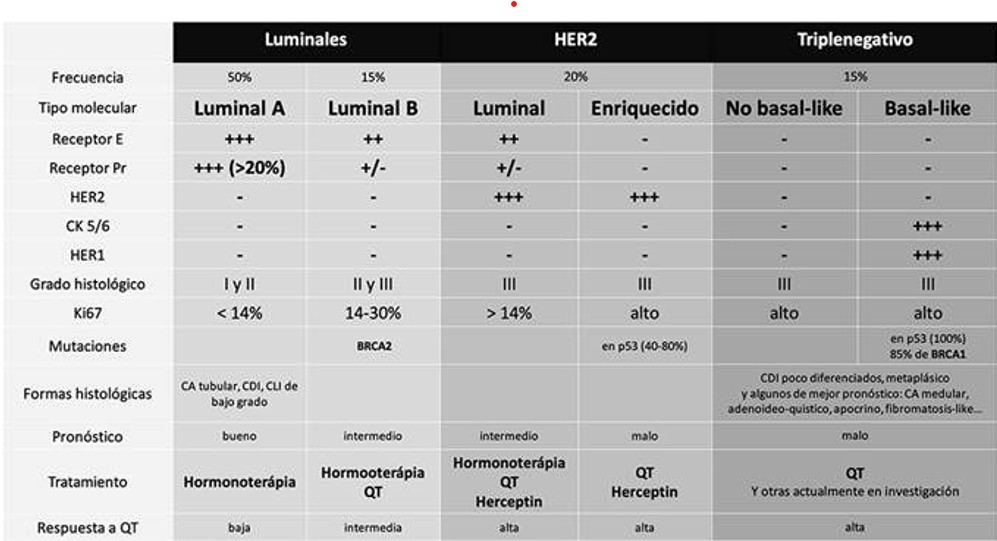

In [853]:
# Mostramos la imagen de ./resources/2025_08_27 BD Proy Salud.png

from IPython.display import Image
Image(filename='./resources/2025_08_28 Tabla para catalogar datos.jpg')  

##### De esta tabla, nos estamos enfocando en los tipos de tumores luminales A y B
---
##### En base a esto, elegiremos los datos que nos interesan para la reducción de nuestra base de datos

In [854]:
# Seleccionamos datos de interés para el análisis de cáncer luminal, además de datos demográficos básicos


luminal_columns = [
    'Id', 'Fecha_De_Nacimiento', 'Fecha_De_Dx_Biopsia', 'Edad_Al_Dx_(Años)',
    'Fecha_1°_Consulta_Om_Cecan', 'Imc', 'Er_%', 'Pr_%',
    'Her2_Ihq_+++','Fish/Sish', 'Ki67_%', 'Grado'
]


# Nueva DB con columnas de interés, la llamamos luminalDf, para denotar "Luminal Dataframe"

luminalDf = df[luminal_columns]

¿Porqué mantener demográficos y de consulta?

1. Nos permiten expandir nuestras conclusiones al añadir tendencias relacionadas con la edad, tiempos de atención entre fechas, etc.

2. El IMC nos podría servir para identificar repercusiones de fenómenos cómo la obesidad o peso en el desarrollo de este cáncer.

---

Mostramos todas las columnas y los primeros registros

In [855]:
pd.set_option('display.max_columns', None) #Para ver cada una de las columnas
luminalDf.head(4)


,Id,Fecha_De_Nacimiento,Fecha_De_Dx_Biopsia,Edad_Al_Dx_(Años),Fecha_1°_Consulta_Om_Cecan,Imc,Er_%,Pr_%,Her2_Ihq_+++,Fish/Sish,Ki67_%,Grado
0,1003-24,9/28/1977,11/24/2023,46,1/5/2024,28.26,10,100,1+,No aplica,5,2
1,1008-18,4/1/1961,1/12/2018,56,1/25/2018,39.35,10,5,1+,No aplica,No aplica,3
2,1008-20,2/10/1979,1/4/2020,40,1/17/2020,18.83,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica
3,1009-19,1/23/1975,11/6/2018,43,1/14/2019,19.91,0,60,1+,No aplica,20,1


In [856]:
# Mostramos la cantidad de registros

print("Cantidad de registros:", luminalDf.shape[0]) # shape[0] nos da el número de registros en el DataFrame

Cantidad de registros: 1366


Tenemos 1366 registros, ahora empezamos la limpieza buscando IDs vacíos o duplicados

In [857]:
#Limpiamos IDs repetidos y nulos, nos quedamos con los primeros repetidos


# Identificamos los IDs duplicados
idsDuplicados = luminalDf[luminalDf.duplicated(subset=['Id'], keep=False)] # keep=False marca todos los duplicados como True



# Comparamos si los duplicados son exactamente iguales en todas las columnas
comparison = idsDuplicados.groupby('Id').apply(lambda x: x.nunique() > 1) # Compara si hay diferencias en las columnas para los mismos IDs
print("\n¿Los duplicados tienen columnas con datos distintos?") # Mostramos si hay diferencias en las columnas para los mismos IDs
print(comparison)

# Eliminamos solo los duplicados que son exactamente iguales en todas las columnas

idsEliminar = comparison.index[~comparison.any(axis=1)] # IDs que son exactamente iguales en todas las columnas
luminalDf = luminalDf[~luminalDf['Id'].isin(idsEliminar) | ~luminalDf.duplicated(subset=luminalDf.columns, keep='first')]   # Eliminamos los duplicados exactos, manteniendo uno solo
luminalDf = luminalDf.drop_duplicates(subset=['Id'], keep='first') # Nos quedamos con el primer registro de cada ID

# Observamos si hay datos nulos en la columna 'Id'
idsNulos = luminalDf['Id'].isnull().sum()
print(f"\nCantidad de IDs nulos: {idsNulos}")

#Mostramos la cantidad de registros después de la limpieza
print("Cantidad de registros después de la limpieza:", luminalDf.shape[0])


¿Los duplicados tienen columnas con datos distintos?
            Id  Fecha_De_Nacimiento  Fecha_De_Dx_Biopsia  Edad_Al_Dx_(Años)  \
Id                                                                            
1012-23  False                False                False              False   
1245-23  False                False                False              False   
1358-24  False                False                 True              False   
1402-23  False                False                False              False   
1413-23  False                False                False              False   
1468-23  False                False                False              False   
1647-20  False                False                False              False   
1656-18  False                False                False              False   
1746-23  False                False                False              False   
1755-23  False                False                False              False  

C:\Users\gilin\AppData\Local\Temp\ipykernel_1152\2927797978.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  comparison = idsDuplicados.groupby('Id').apply(lambda x: x.nunique() > 1) # Compara si hay diferencias en las columnas para los mismos IDs


No hay datos nulos, sin embargo había 15 columnas duplicadas que tenían los datos exactamente igual.

---
Ahora, buscamos que tan significativos son las diferencias entre las filas con Ids duplicados en dónde había diferencia entre las variables.

In [858]:
# Mostramos los datos duplicados que tienen diferencias en alguna columna

difDuplicados = idsDuplicados.groupby('Id').filter(lambda x: x.nunique().gt(1).any()) # Filtra los IDs con diferencias en alguna columna
print(difDuplicados[difDuplicados.columns[difDuplicados.nunique() > 1]]) # Mostramos solo las columnas donde hay diferencias entre los duplicados

          Id Fecha_De_Nacimiento Fecha_De_Dx_Biopsia  Edad_Al_Dx_(Años)  \
285  1358-24          11/28/1959           3/14/2024                 64   
286  1358-24          11/28/1959           2/14/2024                 64   
507  1656-18           5/27/1972            4/1/2018                 45   
508  1656-18           5/27/1972            4/1/2018                 45   
662  1885-22            9/5/1956           7/13/2022                 65   
663  1885-22            9/5/1956           7/13/2022                 65   

    Fecha_1°_Consulta_Om_Cecan    Imc Er_% Pr_% Her2_Ihq_+++     Ki67_% Grado  
285                   4/9/2024  24.53  100  100           1+  No aplica     3  
286                   4/9/2024  24.53  100  100           1+  No aplica     3  
507                   5/7/2018  41.12    0   40           1+          5     2  
508                  7/26/2018  41.12    0   40           1+          5     2  
662                   7/8/2022  35.34   60    0           0+         20   

##### Podemos observar:

1. Los unicos cambios en estos 3 duplicados con diferencias en los valores de las variables son en variables de fechas.

2. Al ser solamente cambios minimos de máximo 1 mes de diferencia, se tomara el que sea cómo elegido para deshacernos del valor duplicado.

3. El otro valor que difiere en una columna duplicada es el IMC, el cuál solo cambia de 35.34 a 35.30, por lo que también sera elegido uno solo y se eliminará el otro (debido a la diferencia tan pequeña de margen).

In [859]:
# Eliminamos los duplicados con diferencias mínimas en fechas o IMC, quedándonos solo con el primero de cada grupo

idsDif = difDuplicados['Id'].unique() # IDs que tienen diferencias en alguna columna
luminalDf = luminalDf[~luminalDf['Id'].isin(idsDif) | ~luminalDf.duplicated(subset=['Id'], keep='first')]  # Eliminamos los duplicados con diferencias mínimas, manteniendo uno solo

# Confirmamos que los IDs duplicados con diferencias mínimas han sido eliminados
print("IDs eliminados por diferencias mínimas:", idsDif)

IDs eliminados por diferencias mínimas: ['1358-24' '1656-18' '1885-22']


---
Ahora, analizaremos los tipos de datos de las columnas.

In [860]:
print("Tipos de datos de cada columna:")
print(luminalDf.dtypes)

Tipos de datos de cada columna:
Id                             object
Fecha_De_Nacimiento            object
Fecha_De_Dx_Biopsia            object
Edad_Al_Dx_(Años)               int64
Fecha_1°_Consulta_Om_Cecan     object
Imc                           float64
Er_%                           object
Pr_%                           object
Her2_Ihq_+++                   object
Fish/Sish                      object
Ki67_%                         object
Grado                          object
dtype: object


##### Podemos identificar varios tipos de datos que no son correctos, por lo que...

- Convertiremos las fechas a "datetime" para facilitar el análisis temporal y permitir operaciones como cálculos de diferencias.
- Los valores de Er_% y Pr_% deben ser convertidos a enteros.



In [861]:
# Cambiamos fechas a datetime

for col in luminalDf.columns:
    if 'Fecha' in col:
        luminalDf[col] = pd.to_datetime(luminalDf[col], errors='coerce') # Convertimos las columnas de fecha a tipo datetime en cada columna que contenga "Fecha"

columnasFechas = [col for col in luminalDf.columns if 'Fecha' in col] # Lista de columnas que contienen "Fecha"


print(luminalDf[columnasFechas].dtypes) # Mostramos los tipos de datos de las columnas que contienen "Fecha"

Fecha_De_Nacimiento           datetime64[ns]
Fecha_De_Dx_Biopsia           datetime64[ns]
Fecha_1°_Consulta_Om_Cecan    datetime64[ns]
dtype: object


In [862]:
# Convertimos las columnas Er_%, Pr_%, Grado y Ki67_% a enteros, forzando errores a NaN y luego a Int64 para permitir nulos


luminalDf['Er_%'] = pd.to_numeric(luminalDf['Er_%'], errors='coerce').astype('Int64')
luminalDf['Pr_%'] = pd.to_numeric(luminalDf['Pr_%'], errors='coerce').astype('Int64')
luminalDf['Grado'] = pd.to_numeric(luminalDf['Grado'], errors='coerce').astype('Int64')
luminalDf['Ki67_%'] = pd.to_numeric(luminalDf['Ki67_%'], errors='coerce').astype('Int64') 


print(luminalDf[['Er_%', 'Pr_%', 'Grado', 'Ki67_%']].dtypes)



Er_%      Int64
Pr_%      Int64
Grado     Int64
Ki67_%    Int64
dtype: object


---
Una vez que corregimos los tipos de datos, verificamos que si estén correctos.


In [863]:
print(luminalDf.dtypes)

Id                                    object
Fecha_De_Nacimiento           datetime64[ns]
Fecha_De_Dx_Biopsia           datetime64[ns]
Edad_Al_Dx_(Años)                      int64
Fecha_1°_Consulta_Om_Cecan    datetime64[ns]
Imc                                  float64
Er_%                                   Int64
Pr_%                                   Int64
Her2_Ihq_+++                          object
Fish/Sish                             object
Ki67_%                                 Int64
Grado                                  Int64
dtype: object


---
##### Buscamos datos únicos para cada columna 

Para observar irregularidades y presencia de valores duplicados de mejor manera.

In [864]:
# Mostramos los valores únicos de las columnas de interés para identificar irregularidades


for col in ['Er_%', 'Pr_%', 'Her2_/_Neu', 'Her2_Ihq_+++','Fish/Sish', 'Ki67_%', 'Grado']:
    if col in luminalDf.columns:
        print(f'Columna: {col}\nValores únicos:\n{luminalDf[col].unique()}\n') # Mostramos los valores únicos de cada columna de interés
    else:
        print(f'Columna {col} no encontrada en luminalDf\n')
            



Columna: Er_%
Valores únicos:
<IntegerArray>
[  10, <NA>,    0,   80,  100,   15,   20,   90,    2,   85,   70,   12,   98,
   60,    5,   95,   30,   50,    4,   65,   40,    7,    1,   55,    8,    6,
   75,    3,   91,   25,   96,   35,   99,    9,   16]
Length: 35, dtype: Int64

Columna: Pr_%
Valores únicos:
<IntegerArray>
[ 100,    5, <NA>,   60,   90,    0,   95,   40,   80,    2,   20,   70,   10,
    3,   50,   25,   30,    8,    7,   35,   65,   75,   15,    1,   18,   22,
   12,    4,   85,   99,   98,    6,   88,   92,   68,    9]
Length: 36, dtype: Int64

Columna Her2_/_Neu no encontrada en luminalDf

Columna: Her2_Ihq_+++
Valores únicos:
['1+' 'No aplica' '0+' '2+' '3+' 'Desconocido']

Columna: Fish/Sish
Valores únicos:
['No aplica' 'Negativo' 'Positivo' 'Desconocido']

Columna: Ki67_%
Valores únicos:
<IntegerArray>
[   5, <NA>,   20,    0,   90,   10,   50,   40,   60,    8,   65,   80,   95,
   25,   30,   70,   15,   45,    3,   12,   47,   14,    7,   35,    2,    1,
 

##### Observamos datos redundantes cómo:

- La misma palabra con espacio(s) adicional(es).
- Datos que no podemos inferir por lo que tendrían que ser descartados (e.g. "No Aplica", "Desconocido")

---
##### Hacemos la limpieza de los datos, esto incluye:

- Reemplazar los valores que no pueden ser inferidos por NaN (aún no serán eliminados debido a su dependencia a otras columnas que si necesitamos).
- Quitar espacios extra en todos los valores para evitar la duplicidad de datos (e.g. "   Negativo ", "Negativo").
- Convertir todos los datos tipo string a minúsculas para evitar problemas de capitalización adecuada.
- Convertir strings a int cuando se pueda hacer (e.g. "1+, 2+, 3+" => 1,2,3)

Todo esto podrá devolverse a su estado original con sus valores originales una vez terminemos todo el proceso de manejo con los datos.


In [865]:

import numpy as np #numpy es una biblioteca para computación científica en Python, la utilizaremos para reemplazar ciertos valores por NaN

# Las columnas categóricas que vamos a limpiar
categorical_cols = ['Her2_Ihq_+++', 'Fish/Sish', 'Grado']  

# Convertir a lowercase para evitar problemas de capitalización

for col in categorical_cols:
    if luminalDf[col].dtype == 'object':  
        luminalDf[col] = luminalDf[col].str.lower()

# Eliminar datos duplicados en las columnas categóricas, usar strip para verificar duplicidad

luminalDf['Her2_Ihq_+++'] = luminalDf['Her2_Ihq_+++'].str.strip() 
luminalDf['Fish/Sish'] = luminalDf['Fish/Sish'].str.strip()


# Reemplazar 'No Aplica' y 'Desconocido' por np.nan en las columnas categóricas

willReplaceValues = ['no aplica', 'desconocido'] # Valores a reemplazar por NaN

for col in categorical_cols:

    luminalDf[col] = luminalDf[col].replace(willReplaceValues, np.nan) # Reemplazamos los valores no aplicables o desconocidos por NaN


# Convertir los valores tipo "1+", "2+", "3+", "0+" a enteros, pero primero manejar nulos

luminalDf['Her2_Ihq_+++'] = luminalDf['Her2_Ihq_+++'].map({'0+': 0, '1+': 1, '2+': 2, '3+': 3}) # Mapear los valores a enteros




En esta acción:

1. Reemplazamos datos que no podemos inferir por nan.

2. Cambiamos temporalmente datos que nos son redundantes (cómo el + en Her2_IHQ+++) para convertirlo a int.

3. Cualquier string lo hicimos en minúsculas para evitar problemas de casing.

---
##### Para reemplazar los valores nulos en Her2_Ihq+++, debemos analizar las tendencias de estos datos en un histograma.

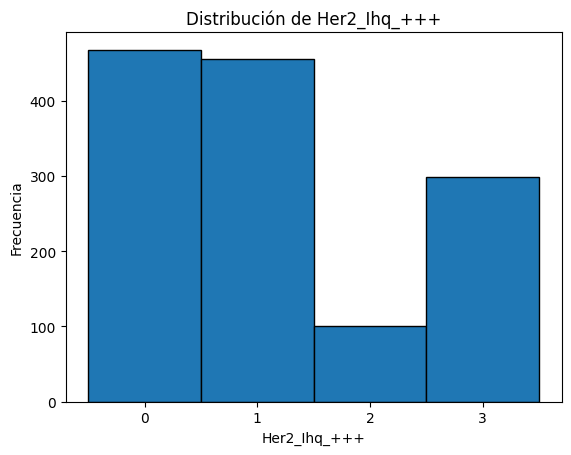

In [866]:
import matplotlib.pyplot as plt

##### Para reemplazar los valores nulos en Her2_Ihq+++, debemos analizar las tendencias de estos datos en un histograma

plt.hist(luminalDf['Her2_Ihq_+++'].dropna(), bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black') # Histograma de Her2_Ihq_+++ sin nulos
plt.xticks([0, 1, 2, 3]) # Mostramos las etiquetas en el eje x
plt.xlabel('Her2_Ihq_+++')
plt.ylabel('Frecuencia')
plt.title('Distribución de Her2_Ihq_+++')
plt.show() # Mostramos el histograma

Basado en estos datos, es conveniente reemplazar por la moda, la cual es 0+.

In [867]:
#replace nulos con la moda

luminalDf['Her2_Ihq_+++'] = luminalDf['Her2_Ihq_+++'].fillna(luminalDf['Her2_Ihq_+++'].mode()[0]).astype(int)

Revisamos valores únicos en las columnas nuevamente después de la limpieza.


In [868]:
#Revisamos valores únicos en las columnas nuevamente después de la limpieza

for col in ['Er_%', 'Pr_%', 'Her2_/_Neu', 'Her2_Ihq_+++','Fish/Sish', 'Ki67_%', 'Grado']:
    if col in luminalDf.columns:
        print(f'Columna: {col}\nValores únicos:\n{luminalDf[col].unique()}\n')

    else:
        print(f'Columna {col} no encontrada en luminalDf\n')


Columna: Er_%
Valores únicos:
<IntegerArray>
[  10, <NA>,    0,   80,  100,   15,   20,   90,    2,   85,   70,   12,   98,
   60,    5,   95,   30,   50,    4,   65,   40,    7,    1,   55,    8,    6,
   75,    3,   91,   25,   96,   35,   99,    9,   16]
Length: 35, dtype: Int64

Columna: Pr_%
Valores únicos:
<IntegerArray>
[ 100,    5, <NA>,   60,   90,    0,   95,   40,   80,    2,   20,   70,   10,
    3,   50,   25,   30,    8,    7,   35,   65,   75,   15,    1,   18,   22,
   12,    4,   85,   99,   98,    6,   88,   92,   68,    9]
Length: 36, dtype: Int64

Columna Her2_/_Neu no encontrada en luminalDf

Columna: Her2_Ihq_+++
Valores únicos:
[1 0 2 3]

Columna: Fish/Sish
Valores únicos:
[nan 'negativo' 'positivo']

Columna: Ki67_%
Valores únicos:
<IntegerArray>
[   5, <NA>,   20,    0,   90,   10,   50,   40,   60,    8,   65,   80,   95,
   25,   30,   70,   15,   45,    3,   12,   47,   14,    7,   35,    2,    1,
   75,   87,   18,  100,   24,   55,    4,   22,   67,   72, 

##### Ahora mostramos cuantos nulos tenemos por columna.

In [869]:
print(luminalDf.isna().sum())  # Nulos por columna
print(luminalDf.isna().sum(axis=1).value_counts()) 


print("Cantidad de registros:", luminalDf.shape[0])


Id                               0
Fecha_De_Nacimiento              1
Fecha_De_Dx_Biopsia              1
Edad_Al_Dx_(Años)                0
Fecha_1°_Consulta_Om_Cecan       3
Imc                              0
Er_%                            30
Pr_%                            31
Her2_Ihq_+++                     0
Fish/Sish                     1253
Ki67_%                         501
Grado                           15
dtype: int64
1    819
2    438
0     61
4     15
5     13
3      5
Name: count, dtype: int64
Cantidad de registros: 1351


Reemplazamos los valores de las fechas con la moda, aquí no importa mucho debido a la variedad de fechas que puede haber.


In [870]:
#reemplazar fechas nulas con la fecha más común (moda)

luminalDf['Fecha_De_Nacimiento'] = luminalDf['Fecha_De_Nacimiento'].fillna(luminalDf['Fecha_De_Nacimiento'].mode()[0])
luminalDf['Fecha_De_Dx_Biopsia'] = luminalDf['Fecha_De_Dx_Biopsia'].fillna(luminalDf['Fecha_De_Dx_Biopsia'].mode()[0])
luminalDf['Fecha_1°_Consulta_Om_Cecan'] = luminalDf['Fecha_1°_Consulta_Om_Cecan'].fillna(luminalDf['Fecha_1°_Consulta_Om_Cecan'].mode()[0])

##### Para los demás valores, buscamos con un histograma cual sería el mejor valor para reemplazarlos.

El histograma muestra una distribución bimodal. Los valores mínimos son 0% y el máximo es 100% Una gran concentración de los registros se encuentran en 0% y la otra gran concentración en 100% . 

Esto dice que en la mayoría de los pacientes, la prueba de estrógeno es negativa (0%) o positiva fuerte (100%), con pocos casos intermedios. En caso de sustituir, el más recomendable es usar moda, debido que los datos se encuentran acumulados en los extremos

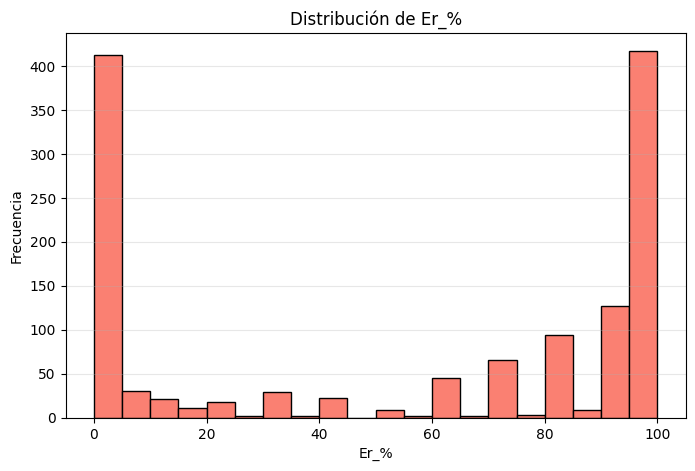

In [871]:
plt.figure(figsize=(8,5))
plt.hist(luminalDf['Er_%'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Er_%')
plt.xlabel('Er_%')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

También presenta una distribución bimodal. El valor mínimo es 0% y el valor máximo es 100%. Una gran cantidad de casos se encuentra en 0% (más de 500 casos) y la otra gran parte se encuentra en la parte alta, especialmente en 90%-100% (más de 200 casos). 

Esto indica que la prueba de progesterona está en negativo (0%) o muy elevada (100%). En caso de sustituir, se recomienda usar la moda, debido a los datos acumulados en los extremos.

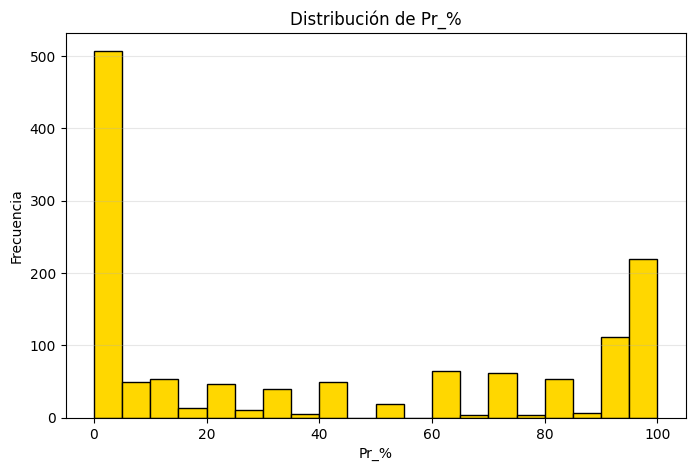

In [872]:
# Histograma que muestre el comportamiento de la columna "Pr_%"
plt.figure(figsize=(8,5))
plt.hist(luminalDf['Pr_%'].dropna(), bins=20, color='gold', edgecolor='black')
plt.title('Distribución de Pr_%')
plt.xlabel('Pr_%')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()



Este gráfico muestra la distribución de los grados de los tumores cancerosos; lo que nos indica:

1. El grado 2 es el más frecuente en la población estudiada.

2. El grado 1 es menos común.
3. El grado 3 tiene una frecuencia intermedia.

Distribución desigual con predominio del grado 2

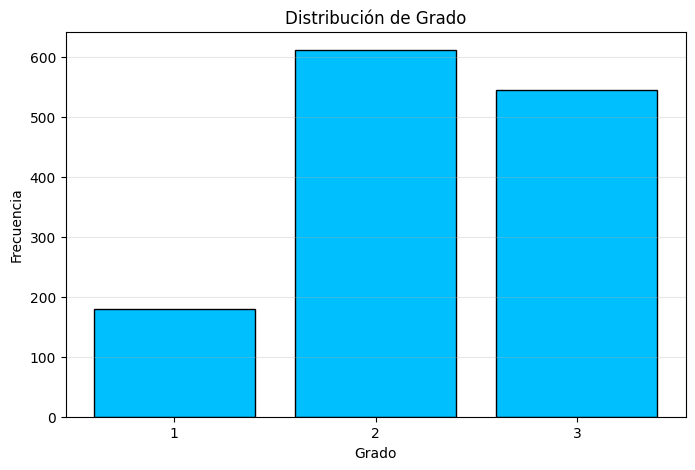

In [873]:
# Histograma que muestre el comportamiento de la columna "Grado"
plt.figure(figsize=(8,5))
plt.hist(luminalDf['Grado'].dropna(), bins=range(int(luminalDf['Grado'].min()), int(luminalDf['Grado'].max())+2), color='deepskyblue', edgecolor='black', align='left', rwidth=0.8)
plt.title('Distribución de Grado')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.xticks(range(int(luminalDf['Grado'].min()), int(luminalDf['Grado'].max())+1))
plt.grid(axis='y', alpha=0.3)
plt.show()

Debido a esto, es conveniente reemplazar los valores nulos con la moda en estas variables que contienen valores nulos.

In [874]:
# Reemplazamos nulos con la moda

luminalDf['Er_%'] = luminalDf['Er_%'].fillna(int(luminalDf['Er_%'].mode().iloc[0])) # Usamos iloc[0] para evitar una advertencia de uso
luminalDf['Pr_%'] = luminalDf['Pr_%'].fillna(int(luminalDf['Pr_%'].mode().iloc[0]))
luminalDf['Grado'] = luminalDf['Grado'].fillna(int(luminalDf['Grado'].mode().iloc[0]))

Nos aseguramos que ya llenamos los nulos que pueden ser reemplazados.

In [875]:
# Mostramos los valores nulos restantes

print(luminalDf.isna().sum()) 
print(luminalDf.isna().sum(axis=1).value_counts()) 

Id                               0
Fecha_De_Nacimiento              0
Fecha_De_Dx_Biopsia              0
Edad_Al_Dx_(Años)                0
Fecha_1°_Consulta_Om_Cecan       0
Imc                              0
Er_%                             0
Pr_%                             0
Her2_Ihq_+++                     0
Fish/Sish                     1253
Ki67_%                         501
Grado                            0
dtype: int64
1    826
2    464
0     61
Name: count, dtype: int64


---
##### 2. Catalogación de Datos

---
### Para la siguiente parte consideramos lo siguiente...

##### Criterios para catalogar luminales

- Si el porcentaje de estrógeno (Er_%) > 50, el Receptor E es Triple Positivo (+++).
- Si el porcentaje de estrógeno (Er_%) <= 50 y > 0, el Receptor E es Doble Positivo (++).

- Si el porcentaje de progesterona (Pr_%) > 20, el Receptor Pr es Triple Positivo (+++).
- Si Her2_Ihq+++ es "0+" o "1+", el tumor es de HER2 Negativo.
- Si Her2_Ihq+++ es "2+", se requiere Fish/Sish para confirmar (y tendría que ser un Fish/Sish Negativo para que el HER2 sea Negativo).







---



##### Buscamos los datos que ya nos permiten generar una respuesta y creamos las columnas correspondientes.

In [876]:
# Para determinar nuestro Receptor Pr, sabemos que...

luminalDf['Receptor_Pr'] = '-' # Inicializamos la columna con '-'
luminalDf.loc[luminalDf['Pr_%'] > 20, 'Receptor_Pr'] = '+++' # Receptor Pr es +++ si Pr_% > 20
luminalDf.loc[(luminalDf['Pr_%'] <= 20) & (luminalDf['Pr_%'] > 0), 'Receptor_Pr'] = '+/-' # sabemos que esto es + o - 

#Confirmamos el reemplazo adecuado
print(luminalDf['Receptor_Pr'].unique()) 

['+++' '+/-' '-']


Filtramos los que sabemos que no pueden ser luminales por porcentaje de Ki67

In [877]:
# Sabemos que un Ki67 > 30% es alto, cuando es alto entonces no aplica para los luminales A o B


luminalDf = luminalDf[luminalDf['Ki67_%'] <= 30]


In [878]:
print("Cantidad de registros:", luminalDf['Ki67_%'].shape[0])

Cantidad de registros: 549


Sabemos que el Receptor E debe ser triple o doble positivo para catalogar como luminal.

In [879]:
# Un Er_% mayor a 0 es requisito para ser luminal A o B

luminalDf = luminalDf[luminalDf['Er_%'] > 0]

# Un Er_% mayor a 50% es triple positivo, si es menor o igual a 50% es doble positivo

luminalDf['Receptor_E'] = '+++'
luminalDf.loc[luminalDf['Er_%'] <= 50, 'Receptor_E'] = '++'

print(luminalDf['Receptor_E'].unique()) # Confirmamos el reemplazo adecuado


['++' '+++']


Sabemos que si el Her2_Ihq+++ es 0+ o 1+ entonces es HER2 negativo, por lo que nos deshacemos del 3+

In [880]:
# Reducimos nuestra base de datos

luminalDf = luminalDf[luminalDf['Her2_Ihq_+++'] <= 2]

In [881]:
print("Cantidad de registros:", luminalDf.shape[0])

Cantidad de registros: 387


Si el Her2_Ihq+++ es 2+, sabemos que para ser un HER2 negativo se necesita el Fish/Sish negativo

In [882]:
# Si el Her2_Ihq+++ es 2+, sabemos que para ser un HER2 negativo se necesita el Fish/Sish negativo

luminalDf = luminalDf[~((luminalDf['Her2_Ihq_+++'] == 2) & (luminalDf['Fish/Sish'] == 'negativo'))] # Nos deshacemos de los registros donde Her2_Ihq_+++ es 2+ pero Fish/Sish no es negativo


print(luminalDf[(luminalDf['Fish/Sish'] == 'negativo')][['Her2_Ihq_+++']].sum()) # Mostramos la suma de Her2_Ihq_+++ donde Fish/Sish es negativo



Her2_Ihq_+++    0
dtype: int64


No hubo valores de HER2 fueron negativos teniendo en cuenta el Fish y el her2_ihq+++ como 2+.

---

In [883]:
print("Cantidad de registros:", luminalDf.shape[0])

Cantidad de registros: 375


##### Criterios para catalogar diferenciar Luminales Tipo A y B

- Si el Receptor Pr es Triple Negativo el tumor es Luminal A, si es Positivo o Negativo podría ser Luminal B.

- Si el Grado es 1 el tumor es Luminal A, si es 2 entonces podría tanto A cómo B, si es 3 podría ser Luminal B o cualquier otro fuera de nuestro enfoque.

- Si el porcentaje de Ki67 es menor del 14%, el tumor es Luminal A, si está entre 14% - 30%, podría ser Luminal B, sin embargo también podría ser fuera de nuestro enfoque.




In [889]:
def catalogar_luminal(row):

    #No estamos considerando todo lo que fue excluido previamente, por lo que no es necesario validar esas condiciones
    # Todos los HER2 restantes son negativos, por lo que no es necesario validar Her2_Ihq_+++ ni Fish/Sish

    if row['Receptor_Pr'] == '+++' and row['Receptor_E'] == '+++' and row['Ki67_%'] < 14:
        return 'Luminal A'

    elif (row['Receptor_Pr'] in ['+/-', '-'] and row['Receptor_E'] == '++' and (row['Ki67_%'] >= 14 and row['Ki67_%'] <= 30)
          and (row['Grado'] == 2 or row['Grado'] == 3)):
        return 'Luminal B'

    else:
        return 'No Luminal'

luminalDf['Tipo_Luminal'] = luminalDf.apply(catalogar_luminal, axis=1)

print(luminalDf['Tipo_Luminal'].value_counts()) 

Tipo_Luminal
No Luminal    224
Luminal A     136
Luminal B      15
Name: count, dtype: int64


Tenemos que 
- 136 casos son tipo A
- 15 son tipo B
- 224 no son luminales o hay datos con conflicto entre ellos
